# EDA To Predict behavior to retain customers

### Contents of the Notebook:

**Part 1: Exploratory Data Analysis(EDA)**
- Analysis of the features
- Finding any relations or trends considering multiple features

**Part 2: Feature Engineering and Data Cleaning**
- Adding any few features
- Removing redundant features
- Converting features into suitable form for modeling

**Part 3: Predictive Modeling1**
- Running Basic Algorithms
- Cross Validation
- Ensembling
- Important Features Extraction


#### The data set includes information about:
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.
Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents






In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier  # Added VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV


### Part 1: Exploratory Data Analysis (EDA)

In [45]:
data = pd.read_csv('./WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [46]:
print("--- EDA: Analysis of Features ---")
print("First 5 rows:")
print(data.head())


--- EDA: Analysis of Features ---
First 5 rows:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport 

In [47]:
print("\nShape:", data.shape)  

print("\nInfo:")
print(data.info())  



Shape: (7043, 21)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling

#### Im ensuring  that there is no gabs in custumer data 

In [48]:

print("\nMissing Values:")
print(data.isnull().sum())  


Missing Values:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


##### Converting  TotalCharges to numeric (account info), fill missing with 0 (new customers)

In [49]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce').fillna(0)

### **1 ) Analysis of Features by Metadata Categories**
- Churn (Target: Left within last month)


Churn (Customers Left Last Month):
Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


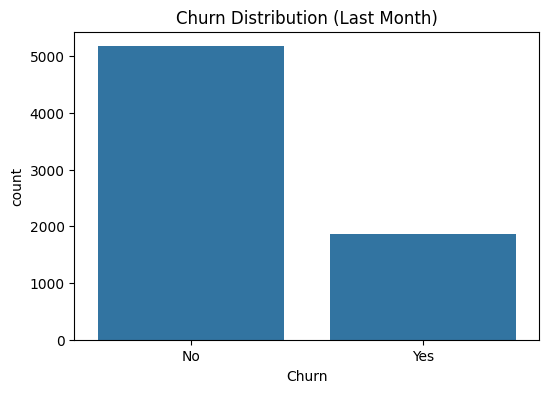

In [50]:
print("\nChurn (Customers Left Last Month):")
print(data['Churn'].value_counts(normalize=True))  
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data= data)
plt.title('Churn Distribution (Last Month)')
plt.show()

- Services  (we can observe that most have PhoneService)

In [51]:
service_cols = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
                'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
print("\nService Subscription Counts:")
for col in service_cols:
    print(f"{col}:")
    print(data[col].value_counts())


Service Subscription Counts:
PhoneService:
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
MultipleLines:
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
InternetService:
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
OnlineSecurity:
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
OnlineBackup:
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64
DeviceProtection:
DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64
TechSupport:
TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64
StreamingTV:
StreamingTV
No                     2810
Yes                    2707
No in

- Account Info (Numerical)


Account Info (Numerical) Summary:
            tenure  MonthlyCharges  TotalCharges
count  7043.000000     7043.000000   7043.000000
mean     32.371149       64.761692   2279.734304
std      24.559481       30.090047   2266.794470
min       0.000000       18.250000      0.000000
25%       9.000000       35.500000    398.550000
50%      29.000000       70.350000   1394.550000
75%      55.000000       89.850000   3786.600000
max      72.000000      118.750000   8684.800000


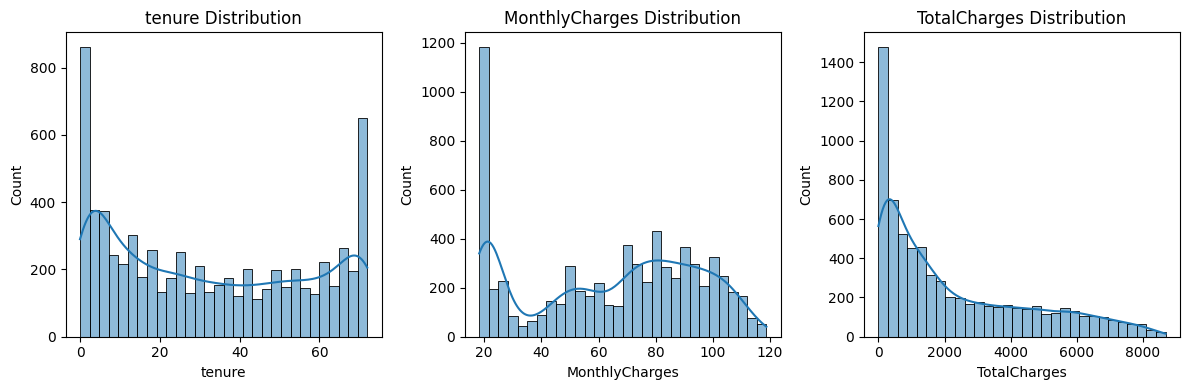

In [52]:
account_num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
print("\nAccount Info (Numerical) Summary:")
print(data[account_num_cols].describe())
plt.figure(figsize=(12, 4))
for i, col in enumerate(account_num_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f'{col} Distribution')
plt.tight_layout()
plt.show()

- Demographics


gender Distribution:
gender
Male      0.504756
Female    0.495244
Name: proportion, dtype: float64


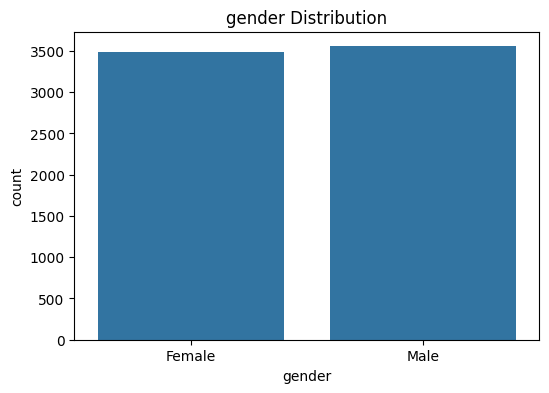


SeniorCitizen Distribution:
SeniorCitizen
0    0.837853
1    0.162147
Name: proportion, dtype: float64


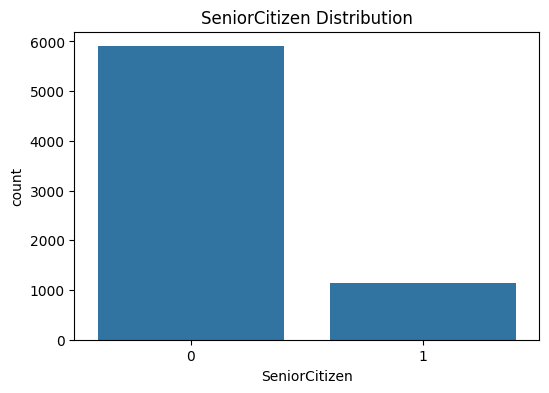


Partner Distribution:
Partner
No     0.516967
Yes    0.483033
Name: proportion, dtype: float64


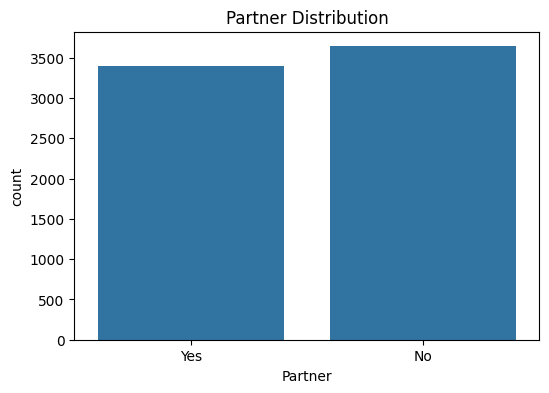


Dependents Distribution:
Dependents
No     0.700412
Yes    0.299588
Name: proportion, dtype: float64


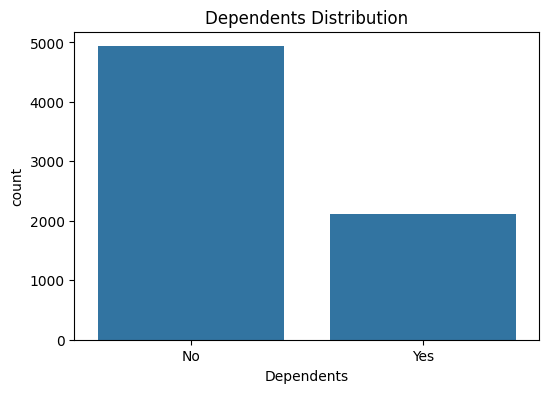

In [54]:
demo_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
for col in demo_cols:
    print(f"\n{col} Distribution:")
    print(data[col].value_counts(normalize=True))
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=data)
    plt.title(f'{col} Distribution')
    plt.show()

### **2) Relations and Trends Considering Multiple Features**

-  Churn vs. Services


--- EDA: Relations and Trends ---

Churn vs. PhoneService:
Churn               No       Yes
PhoneService                    
No            0.750733  0.249267
Yes           0.732904  0.267096


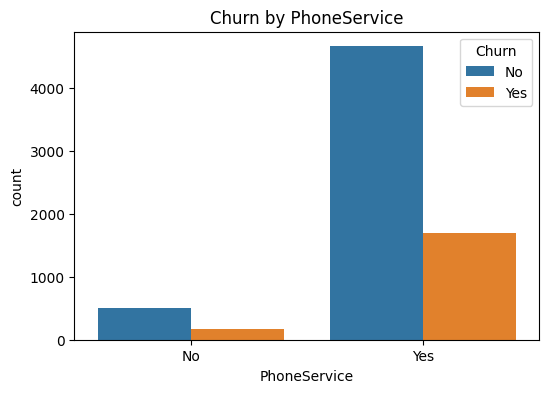


Churn vs. MultipleLines:
Churn                   No       Yes
MultipleLines                       
No                0.749558  0.250442
No phone service  0.750733  0.249267
Yes               0.713901  0.286099


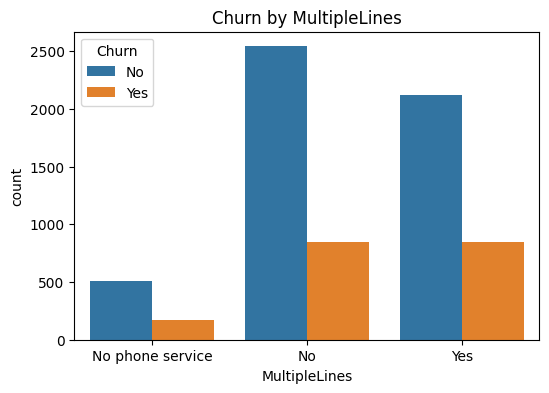


Churn vs. InternetService:
Churn                  No       Yes
InternetService                    
DSL              0.810409  0.189591
Fiber optic      0.581072  0.418928
No               0.925950  0.074050


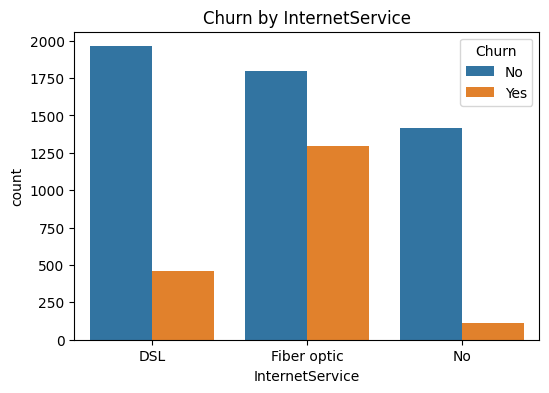


Churn vs. OnlineSecurity:
Churn                      No       Yes
OnlineSecurity                         
No                   0.582333  0.417667
No internet service  0.925950  0.074050
Yes                  0.853888  0.146112


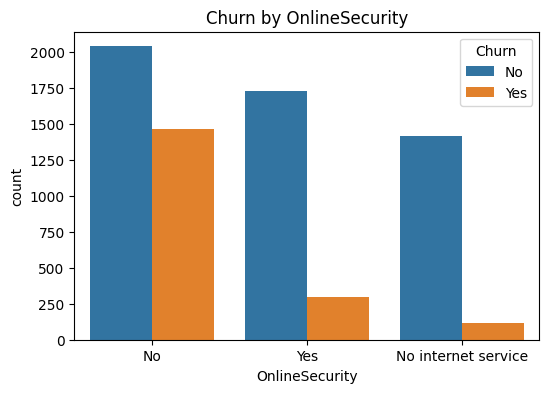


Churn vs. OnlineBackup:
Churn                      No       Yes
OnlineBackup                           
No                   0.600712  0.399288
No internet service  0.925950  0.074050
Yes                  0.784685  0.215315


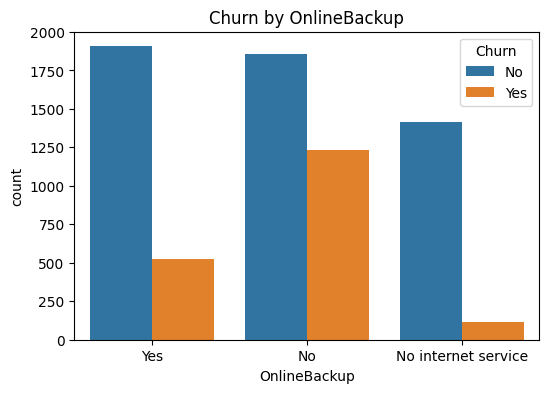


Churn vs. DeviceProtection:
Churn                      No       Yes
DeviceProtection                       
No                   0.608724  0.391276
No internet service  0.925950  0.074050
Yes                  0.774979  0.225021


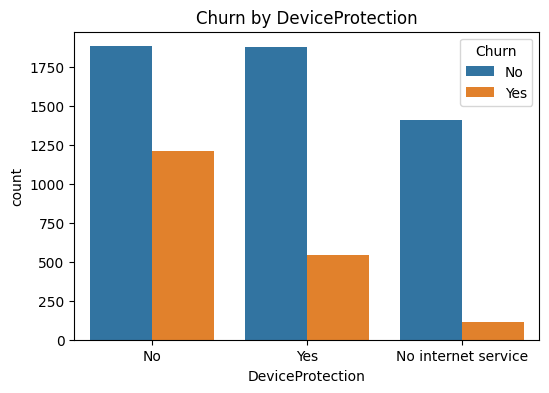


Churn vs. TechSupport:
Churn                      No       Yes
TechSupport                            
No                   0.583645  0.416355
No internet service  0.925950  0.074050
Yes                  0.848337  0.151663


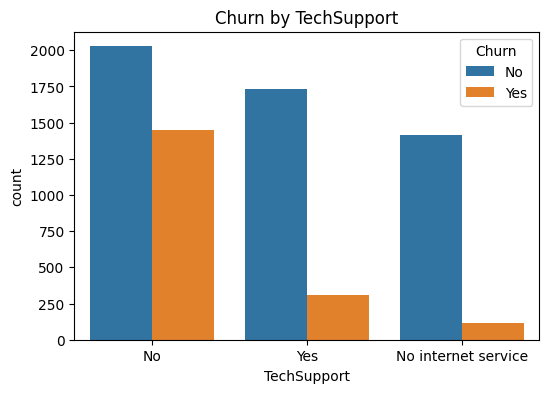


Churn vs. StreamingTV:
Churn                      No       Yes
StreamingTV                            
No                   0.664769  0.335231
No internet service  0.925950  0.074050
Yes                  0.699298  0.300702


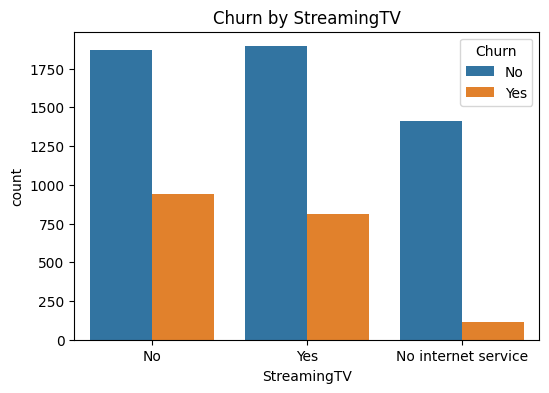


Churn vs. StreamingMovies:
Churn                      No       Yes
StreamingMovies                        
No                   0.663196  0.336804
No internet service  0.925950  0.074050
Yes                  0.700586  0.299414


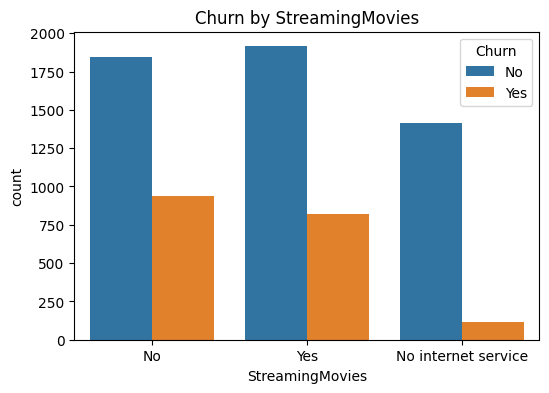

In [55]:
print("\n--- EDA: Relations and Trends ---")
for col in service_cols:
    print(f"\nChurn vs. {col}:")
    print(pd.crosstab(data[col], data['Churn'], normalize='index'))
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue='Churn', data=data)
    plt.title(f'Churn by {col}')
    plt.show()

- Churn vs. Demographics (SeniorCitizen) Comment: Seniors (1) churn more (~40% vs. ~25%)


Churn vs. SeniorCitizen:
Churn                No       Yes
SeniorCitizen                    
0              0.763938  0.236062
1              0.583187  0.416813


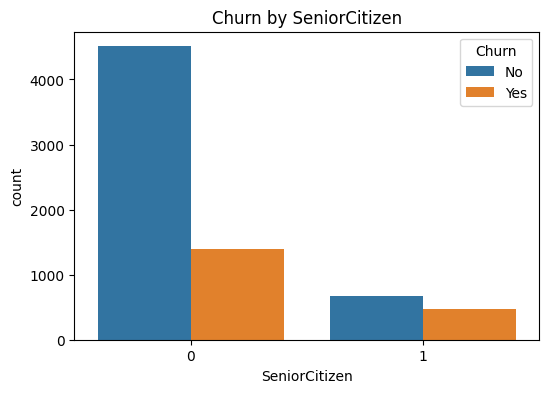

In [56]:

print("\nChurn vs. SeniorCitizen:")
print(pd.crosstab(data['SeniorCitizen'], data['Churn'], normalize='index'))
plt.figure(figsize=(6, 4))
sns.countplot(x='SeniorCitizen', hue='Churn', data=data)
plt.title('Churn by SeniorCitizen')
plt.show()


- Correlation (Account Info Numerical)


Correlation Matrix (Account Info):
                  tenure  MonthlyCharges  TotalCharges
tenure          1.000000        0.247900      0.826178
MonthlyCharges  0.247900        1.000000      0.651174
TotalCharges    0.826178        0.651174      1.000000


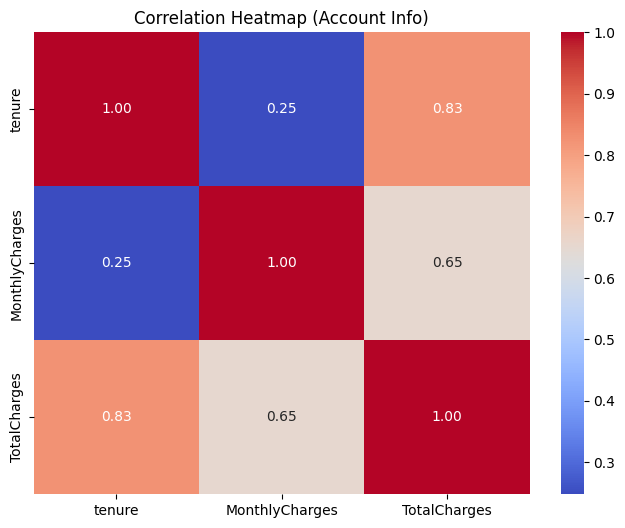

In [57]:

print("\nCorrelation Matrix (Account Info):")
print(data[account_num_cols].corr())
plt.figure(figsize=(8, 6))
sns.heatmap(data[account_num_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (Account Info)')
plt.show()

### **2) Feature Engineering and Data Cleaning**

#### **Adding New Features**
- Feature: Service Bundle Count (total services subscribed)

In [58]:
print("\n--- Feature Engineering and Data Cleaning ---")
data['ServiceBundleCount'] = data[service_cols].apply(lambda x: (x == 'Yes').sum(), axis=1)
print("\nService Bundle Count Distribution:")
print(data['ServiceBundleCount'].value_counts())


--- Feature Engineering and Data Cleaning ---

Service Bundle Count Distribution:
ServiceBundleCount
1    1701
2    1188
3     965
4     922
5     908
6     676
7     395
8     208
0      80
Name: count, dtype: int64


- Feature: Charge per Month (TotalCharges / tenure, handle division by 0)

In [59]:

data['ChargePerMonth'] = np.where(data['tenure'] == 0, data['MonthlyCharges'], data['TotalCharges'] / data['tenure'])
print("\nCharge per Month Summary:")
print(data['ChargePerMonth'].describe())


Charge per Month Summary:
count    7043.000000
mean       64.762906
std        30.189796
min        13.775000
25%        35.935156
50%        70.337500
75%        90.174158
max       121.400000
Name: ChargePerMonth, dtype: float64


#### **Removing redundant features**

In [60]:
data.drop('customerID', axis=1, inplace=True)  

##### **Converting Features for Modeling**
- Encode categorical variables

In [61]:
le = LabelEncoder()
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])
print("\nData after Encoding:")
print(data.head())


Data after Encoding:
   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  ...  \
0              1                0               0             2  ...   
1              0                0               2             0  ...   
2              0                0               2             2  ...   
3              1                0               2             0  ...   
4              0                1               0             0  ...   

   StreamingTV  StreamingMovies  Contract  PaperlessBilling  PaymentMethod  \
0            0                0         

- Standardize numerical features

In [62]:
scaler = StandardScaler()
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'ServiceBundleCount', 'ChargePerMonth']
data[num_cols] = scaler.fit_transform(data[num_cols])
print("\nData after Scaling:")
print(data[num_cols].head())



Data after Scaling:
     tenure  MonthlyCharges  TotalCharges  ServiceBundleCount  ChargePerMonth
0 -1.277445       -1.160323     -0.992611           -1.145997       -1.156529
1  0.066327       -0.259629     -0.172165           -0.176011       -0.304408
2 -1.236724       -0.362660     -0.958066           -0.176011       -0.354049
3  0.514251       -0.746535     -0.193672           -0.176011       -0.790302
4 -1.236724        0.197365     -0.938874           -1.145997        0.366444


### 3) **Predictive Modeling**

- Split features and target

In [63]:
print("\n--- Predictive Modeling ---")
X = data.drop('Churn', axis=1)
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




--- Predictive Modeling ---


##### **Running Basic Algorithms**
- Logistic Regression

In [64]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("\nLogistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))



Logistic Regression Performance:
Accuracy: 0.8147622427253371
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.62       373

    accuracy                           0.81      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.81      0.81      1409



- Random Forest

In [65]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("\nRandom Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Performance:
Accuracy: 0.794889992902768
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.47      0.55       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



- Gradient Boosting

In [66]:

gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print("\nGradient Boosting Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))


Gradient Boosting Performance:
Accuracy: 0.8041163946061036
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1036
           1       0.67      0.51      0.58       373

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409



##### **Cross Validation**

In [67]:

print("\nCross Validation Scores:")
cv_scores_lr = cross_val_score(lr, X, y, cv=5)
print("Logistic Regression CV Accuracy:", cv_scores_lr.mean(), "+/-", cv_scores_lr.std())
cv_scores_rf = cross_val_score(rf, X, y, cv=5)
print("Random Forest CV Accuracy:", cv_scores_rf.mean(), "+/-", cv_scores_rf.std())
cv_scores_gb = cross_val_score(gb, X, y, cv=5)
print("Gradient Boosting CV Accuracy:", cv_scores_gb.mean(), "+/-", cv_scores_gb.std())



Cross Validation Scores:
Logistic Regression CV Accuracy: 0.8016480901993678 +/- 0.009777940254210861
Random Forest CV Accuracy: 0.7939808616684948 +/- 0.008059093669513713
Gradient Boosting CV Accuracy: 0.8030674358023099 +/- 0.009259883357270045


##### **Ensembling (Voting Classifier)**

In [68]:

ensemble = VotingClassifier(estimators=[('lr', lr), ('rf', rf), ('gb', gb)], voting='soft')
ensemble.fit(X_train, y_train)
y_pred_ensemble = ensemble.predict(X_test)
print("\nEnsemble Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_ensemble))
print(classification_report(y_test, y_pred_ensemble))



Ensemble Performance:
Accuracy: 0.8133427963094393
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.69      0.54      0.60       373

    accuracy                           0.81      1409
   macro avg       0.77      0.73      0.74      1409
weighted avg       0.80      0.81      0.81      1409



##### **Important Features Extraction**


Top 10 Important Features (Random Forest):
               Feature  Importance
18        TotalCharges    0.149265
4               tenure    0.141672
20      ChargePerMonth    0.137437
17      MonthlyCharges    0.134765
14            Contract    0.069980
8       OnlineSecurity    0.050283
16       PaymentMethod    0.044470
11         TechSupport    0.031603
19  ServiceBundleCount    0.031115
0               gender    0.024023


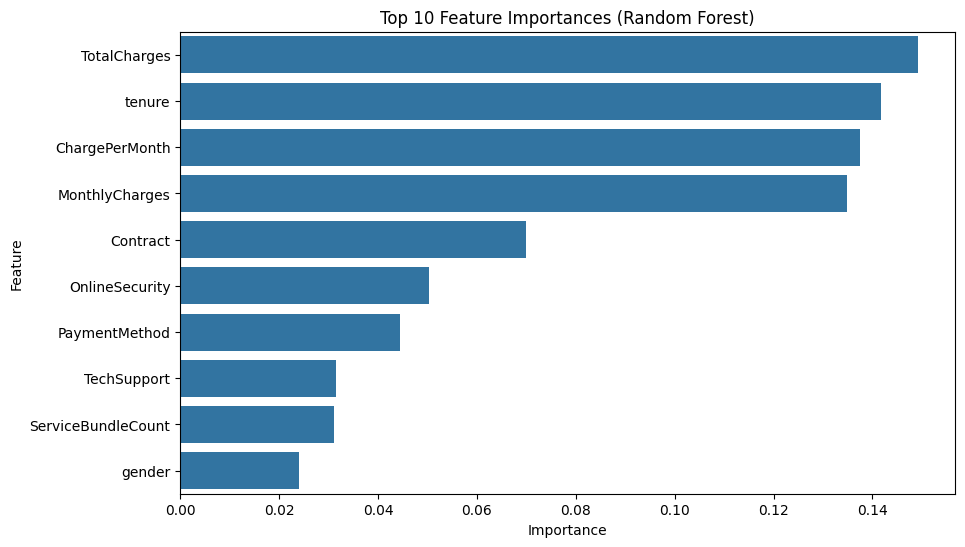

In [69]:

importances = rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)
print("\nTop 10 Important Features (Random Forest):")
print(feature_importance_df.head(10))
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 Feature Importances (Random Forest)')
plt.show()